In [0]:
import numpy as np
import imageio
import cv2 as cv2
import matplotlib.pyplot as plt
import glob
import skimage
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/TEST/
  inflating: data/TEST/02_inf.csv    
  inflating: data/TEST/04_inf.csv    
  inflating: data/TEST/05_inf.csv    
  inflating: data/TEST/01_inf.csv    
  inflating: data/TEST/01_inf.jpg    
  inflating: data/TEST/02_inf.jpg    
  inflating: data/TEST/04_inf.jpg    
  inflating: data/TEST/05_inf.jpg    
  inflating: data/TEST/03_inf.csv    
  inflating: data/TEST/03_inf.jpg    
   creating: data/TRAIN/
  inflating: data/TRAIN/842 Agapostemon texanus f right 3.2x.jpg  
  inflating: data/TRAIN/133 Lasioglossum nymphaerum f right 4x.jpg  
  inflating: data/TRAIN/154 Lasioglossum nymphaerum f right 4x.jpg  
  inflating: data/TRAIN/1 Lasioglossum leucozonium f right 3.2x.jpg  
  inflating: data/TRAIN/173 Lasioglossum rohweri f left 4x.jpg  
  inflating: data/TRAIN/84 Lasioglossum MAWIspB f left 4x.jpg  
  inflating: data/TRAIN/385 Lasioglossum leucozonium f left 3.2x.jpg  
  inflating: data/TRAIN/62 Lasioglossum rohweri f right 4x

In [0]:
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('data/TRAIN/*.jpg')])
# Load one image and CSV from TEST
test_img = imageio.imread('data/TEST/01_inf.jpg')
test_points = np.genfromtxt('data/TEST/01_inf.csv', delimiter=',')

In [0]:
# Draw points from CSV on the image
def draw_points(img, points):
    img_copy = img.copy()
    for point in points:
        cv2.circle(img_copy,(int(point[1]), int(point[0])), 20, (255,255,0), -1)
    return img_copy

# Preprocessing

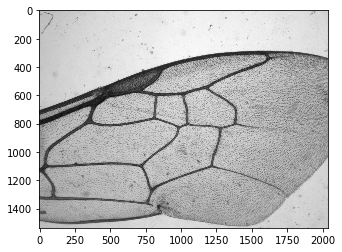

In [30]:
#im = cv2.imread('../TEST/0_inf.jpg')
im = train_imgs[0]
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img.shape, img.dtype
plt.imshow(img, cmap='gray')

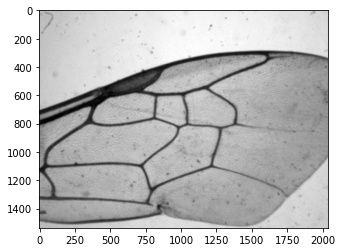

In [31]:
for i in range(20):
    blur = cv2.GaussianBlur(img,(5,5),0)
    img = blur
plt.imshow(blur, cmap='gray')

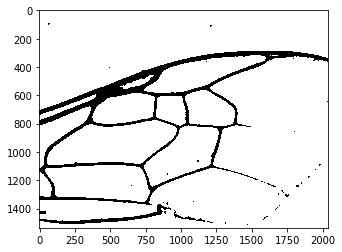

In [32]:
window_size = 159
threshold_val = threshold_sauvola(img, window_size=window_size)
bin_img = (img > threshold_val).astype(np.uint8)
plt.imshow(bin_img, cmap = 'gray')

# Connected Components

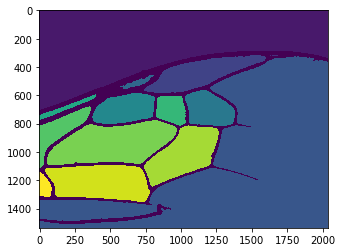

In [33]:
import skimage.morphology

all_labels = skimage.measure.label(1 - skimage.morphology.remove_small_objects((1 - bin_img).astype(bool),min_size=5000))
plt.imshow(all_labels)

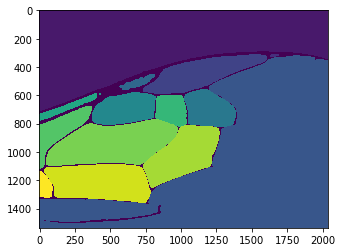

In [34]:
kernel = np.ones((5,5), np.uint8)
img_dilate = cv2.dilate(all_labels.astype(np.uint8), kernel, iterations=3) 
plt.imshow(img_dilate)

# Keypoint Detection

In [0]:
def intersect(img):
    height, width = img.shape
    step = 60
    points = []
    for i in range(0, height-step, 1):
        for j in range(0, width-step, 1):
            colors = set()
            if img[i][j] == 0:
              for k in range(i, i+step):
                  for l in range(j, j+step):
                      pixel = img[k][l]
                      if pixel not in colors:
                          colors.add(pixel)
              if len(colors) >= 4:
                  points.append((i, j))
    return points

In [44]:
points = intersect(all_labels)
print(points)

[(286, 1574), (286, 1575), (286, 1576), (286, 1577), (286, 1578), (286, 1579), (286, 1580), (286, 1581), (286, 1582), (286, 1583), (286, 1584), (286, 1585), (286, 1586), (286, 1587), (286, 1588), (286, 1589), (286, 1590), (286, 1591), (286, 1592), (286, 1593), (286, 1594), (286, 1595), (286, 1596), (286, 1597), (286, 1598), (286, 1599), (286, 1600), (286, 1601), (286, 1602), (286, 1603), (286, 1604), (286, 1605), (286, 1606), (286, 1607), (286, 1608), (286, 1609), (286, 1610), (286, 1611), (286, 1612), (286, 1613), (286, 1614), (286, 1615), (286, 1616), (286, 1617), (286, 1618), (286, 1619), (286, 1620), (286, 1621), (286, 1622), (286, 1623), (286, 1624), (286, 1625), (286, 1626), (286, 1627), (286, 1628), (287, 1589), (287, 1590), (287, 1591), (287, 1592), (287, 1593), (287, 1594), (287, 1595), (287, 1596), (287, 1597), (287, 1598), (287, 1599), (287, 1600), (287, 1601), (287, 1602), (287, 1603), (287, 1604), (287, 1605), (287, 1606), (287, 1607), (287, 1608), (287, 1609), (287, 1610)

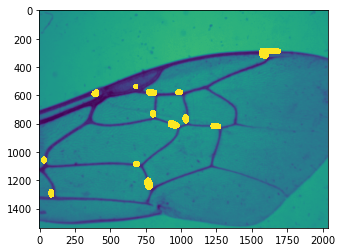

In [45]:
plt.imshow(draw_points(img, points))

# Process all

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


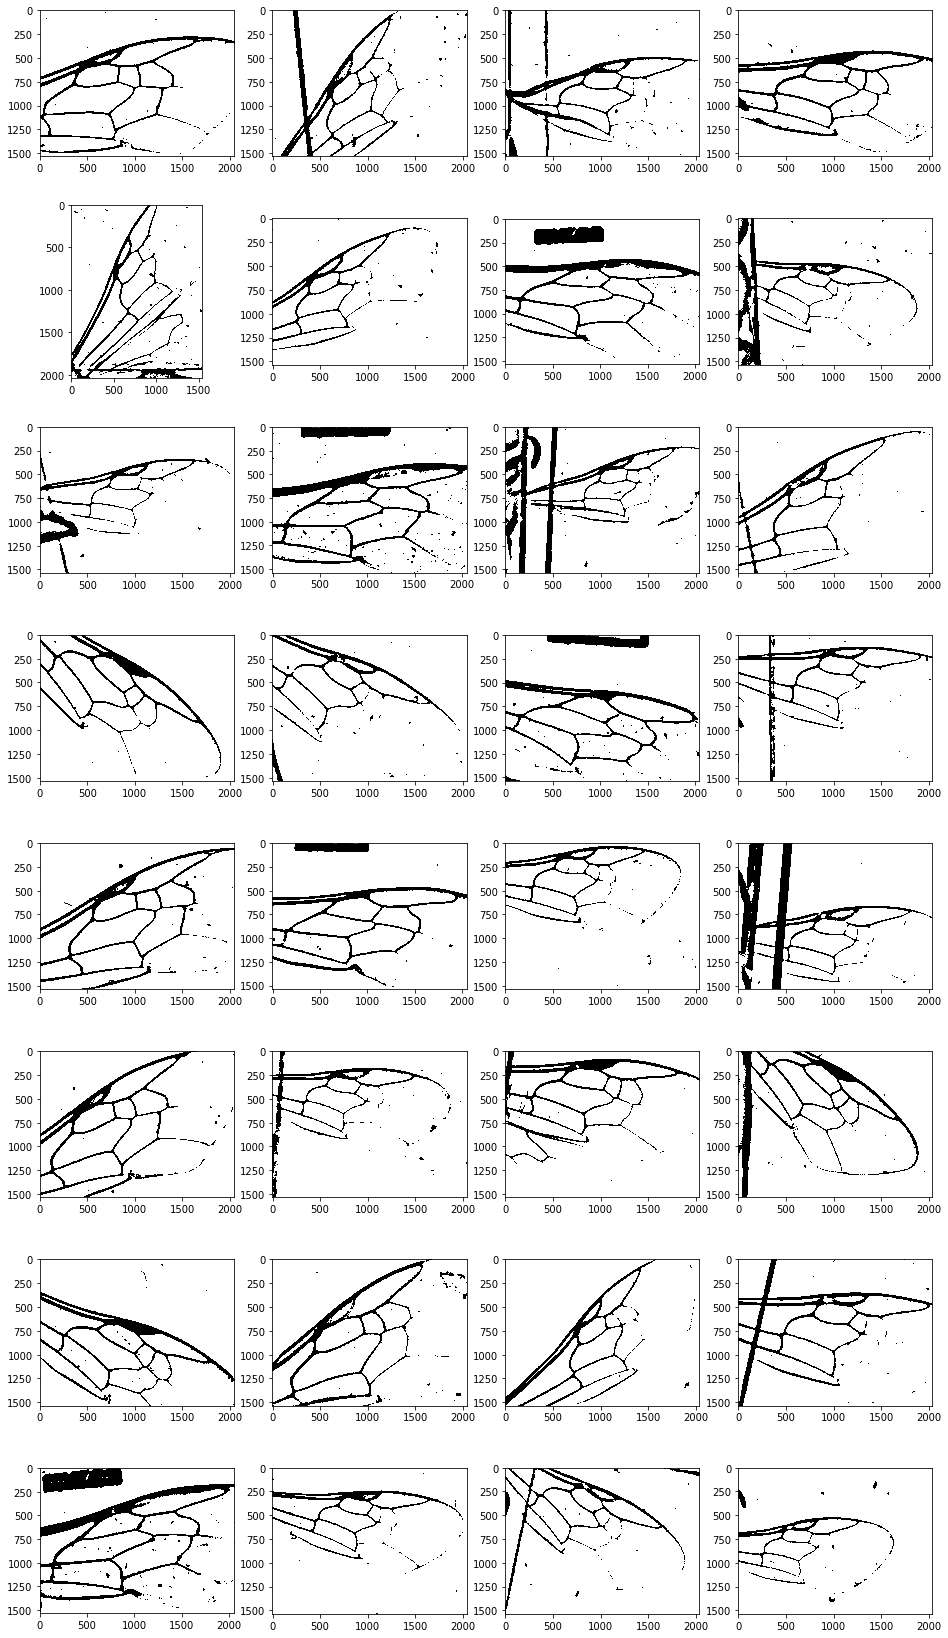

In [27]:
fig=plt.figure(figsize=(16, 30))
#bin_imgs = []
for i in range(train_imgs.shape[0]):
    print(i)
    img_gray = cv2.cvtColor(train_imgs[i].copy(), cv2.COLOR_BGR2GRAY)
    #print(img_gray.shape)
    for j in range(20):
        blur = cv2.GaussianBlur(img_gray,(5,5),0)
        img_gray = blur
    
    threshold_val = threshold_sauvola(img_gray, window_size=window_size)
    binarized = (img_gray > threshold_val).astype(np.uint8)
    #bin_imgs.append(binarized)
    #bin_imgs[i] = binarized
    fig.add_subplot(8, 4, i+1)
    plt.imshow(binarized, cmap='gray')
plt.show()